# K-Means Clustering

## Importing the libraries

In [5]:
import numpy as np 
# this library allows you to work with arrays
import matplotlib.pyplot as plt 
#chart plotting
import pandas as pd 
#allow us to not only import the dataset, but also create the matrix of features, 
#and the dependent variable vector.

## Importing the dataset

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
# if the delimiter is a semicolon 
# file_path = "your_dataset.csv"
# delimiter = ";"
# df = pd.read_csv(file_path, sep=delimiter)
X = dataset.iloc[:, [3, 4]].values
# we do not have a dependent varialble but in order to identify these patterns, will only need annual income and 
#spending score. To visualize the clusters we need a 2D plot (X axis Y axis) so we will only bring in income and 
#spending score. With iloc we select specific columns by putting the column choices inside another pair of square brackets

#  since we don't have a dependent variable we don't need y=dataset

## Using the elbow method to find the optimal number of clusters

C:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

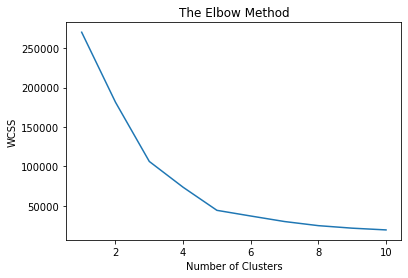

In [7]:
#use "from sklearn" when you want to import specific components directly for convenience and "import sklearn" when 
#you want to import the entire library and refer to its components with the full path
from sklearn.cluster import KMeans

#use a for loop to run the K-Means algorithm with 10 different numbers of clusters using WCSS, which is defined as 
#the sum of the square distances between each observation point of the cluster and the central width of the cluster. 
#The x-axis will contain the # of clusters (1-10), and the y-axis the computed WCSS for each cluster.

#create a list the for loop will populate w successive WCSS values for each cluster. Call the list WCSS, which we will 
#initialize as an empty list by using an empty square bracket and then append it w the different WCSS values for each 
#cluster. Start the for loop w the iterative variable i, and the range (1, 11) then create the first K-Means object w 
#the parameters (n_clusters = i, init = 'k-means++', random_state = 0)
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #objects and classes have attributes that give you the values you want. To get the values 
    #from the attribute call the object then a dot and the attribute (kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
 # https://chatgpt.com/share/2fe42daa-002e-41cc-b063-13d74b2546b9  
    

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=10, random_state = 0)
y_kmeans = kmeans.fit_predict(X) 
#_predict method will train your model on the dataset and return the dependent variable which we lablel y_kmeans

#https://chatgpt.com/share/f038cf2f-1c01-4eaa-abe4-929ad8ef4e7b

C:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
print(y_kmeans) #remember 3 is actually 4 

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


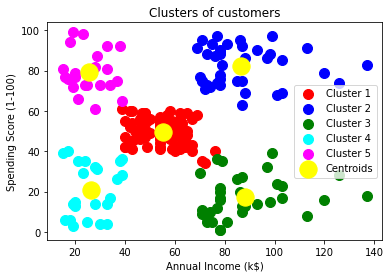

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Visualising the clusters

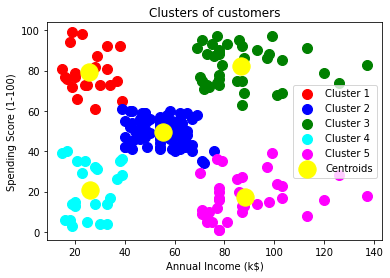

In [5]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()